###  Created by Luis Alejandro (alejand@umich.edu)

In [8]:
import tensorflow as tf
import numpy as np
from utils import unicode_to_ascii
from dataset import DatasetBuilder
from attention_translation import preprocess
from attention_translation import Translator
from attention_translation import plot_attention
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
# GPU?
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Creates dataset for training
files = ['../../datasets/nlp/english-spanish.txt']
builder = DatasetBuilder(files, preprocessors=(preprocess,preprocess), batch_size=64, max_obs=30000, test_obs=40)
train_dataset, test_dataset = builder.build()

In [4]:
# Load embedding matrix (glove vectors) -> these will only be used for English (source/input)
embedding_size = 100
word_to_vector = {}
with open('../../datasets/glove.6B/glove.6B.%sd.txt' % embedding_size, encoding='utf8') as file:
    for line in file:
        values = line.split()
        word = unicode_to_ascii(values[0])
        vector = np.asarray(values[1:],dtype=np.float32)
        word_to_vector[word] = vector
        
embedding_vectors = np.zeros((len(builder.source_tokenizer.word_to_index), embedding_size))
for word, index in builder.source_tokenizer.word_to_index.items():
    if word.decode() in word_to_vector:
        embedding_vectors[index,:] = word_to_vector[word.decode()]

In [5]:
# Defining model
translator = Translator(builder.source_tokenizer.word_to_index,
                        builder.target_tokenizer.word_to_index,
                        source_embedding_matrix=embedding_vectors,
                        target_embedding_size=embedding_size,
                        max_output_length=builder.target_tokenizer.max_seq,
                        attention_size=512,
                        restore=True)

In [12]:
# Training model
translator.train(10, train_dataset, test_dataset)

Epoch 1 out of 10 complete (59.27 secs) -- Train Loss: 0.5349 -- Train Acc: 0.89 -- Test Loss: 0.6156 -- Test Acc: 0.91
Epoch 2 out of 10 complete (26.90 secs) -- Train Loss: 0.4693 -- Train Acc: 0.90 -- Test Loss: 0.5842 -- Test Acc: 0.92
Epoch 3 out of 10 complete (27.10 secs) -- Train Loss: 0.4110 -- Train Acc: 0.91 -- Test Loss: 0.5615 -- Test Acc: 0.92
Epoch 4 out of 10 complete (27.52 secs) -- Train Loss: 0.3602 -- Train Acc: 0.92 -- Test Loss: 0.5512 -- Test Acc: 0.92
Epoch 5 out of 10 complete (27.28 secs) -- Train Loss: 0.3165 -- Train Acc: 0.93 -- Test Loss: 0.5325 -- Test Acc: 0.92
Epoch 6 out of 10 complete (28.05 secs) -- Train Loss: 0.2804 -- Train Acc: 0.93 -- Test Loss: 0.5375 -- Test Acc: 0.93
Epoch 7 out of 10 complete (29.83 secs) -- Train Loss: 0.2497 -- Train Acc: 0.94 -- Test Loss: 0.5249 -- Test Acc: 0.93
Epoch 8 out of 10 complete (28.22 secs) -- Train Loss: 0.2243 -- Train Acc: 0.95 -- Test Loss: 0.5295 -- Test Acc: 0.93
Epoch 9 out of 10 complete (28.74 secs) 

In [10]:
# Creating some input
source = b"I'm very happy to see you."
source = preprocess(tf.constant(source))
source = tf.strings.split(tf.constant(source))
print(source)
source = builder.source_tokenizer.encode(source.numpy())
source = tf.constant(np.pad(source, (0, builder.source_tokenizer.max_seq - len(source))),
                     shape=[1, builder.source_tokenizer.max_seq])
print(source)

tf.Tensor([b'<start>' b'i' b'm' b'very' b'happy' b'to' b'see' b'you' b'.' b'<end>'], shape=(10,), dtype=string)
tf.Tensor([[  0  17  49 946 295 255 104 105   2   3   0]], shape=(1, 11), dtype=int32)


estoy contento de verte . <end>


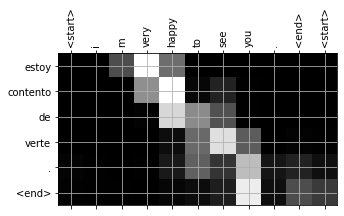

In [13]:
# Outputing model translation
prediction, attention = translator.translate(source, return_attention=True)
print(' '.join(builder.target_tokenizer.index_to_word[word].decode() for word in prediction))
plot_attention(attention, tf.squeeze(source).numpy(), prediction,
               builder.source_tokenizer.index_to_word,
               builder.target_tokenizer.index_to_word)

Expected: sea bueno .
Translation: sean buenos .


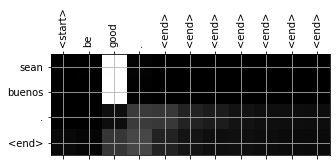

Expected: no le temo a nadie .
Translation: no me temo a nadie .


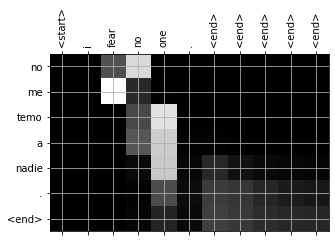

Expected: estan perfectamente .
Translation: estan bien .


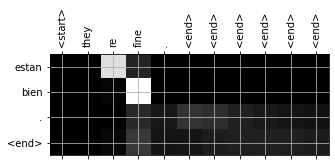

Expected: llegaras lejos .
Translation: llegareis lejos .


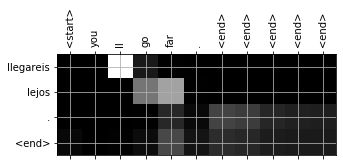

Expected: tom es feo .
Translation: tom es feo .


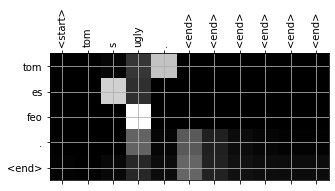

Expected: nosotros podemos pagar en metalico .
Translation: nosotros podemos pagar pagar .


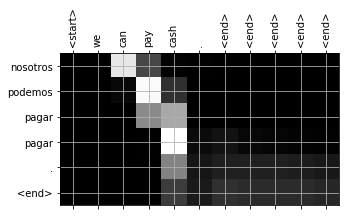

Expected: abreme .
Translation: abreme .


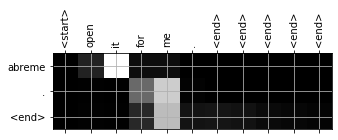

Expected: centrate .
Translation: sigue trabajando .


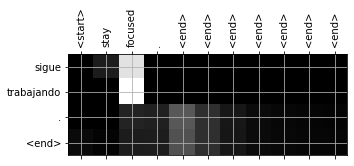

Expected: tom esta ausente .
Translation: tom esta ausente .


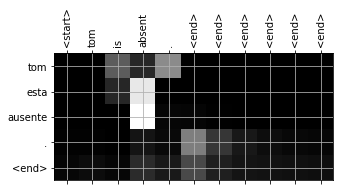

Expected: hice una apuesta .
Translation: hice un mapa .


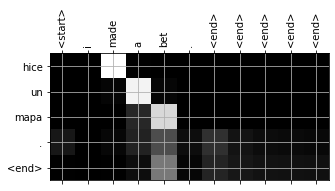

Expected: tom parece estar aburrido .
Translation: tom parece aburrido .


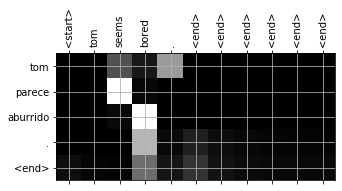

Expected: se clemente .
Translation: se clemente .


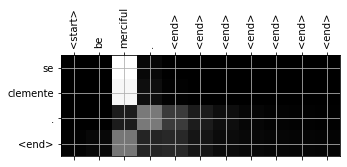

Expected: estoy tan gordo .
Translation: estoy tan gordo .


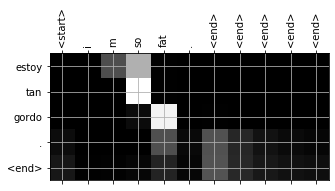

Expected: soy alguien responsable .
Translation: soy responsable .


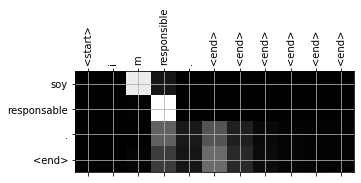

Expected: ellos llamaran .
Translation: ellos llamaran .


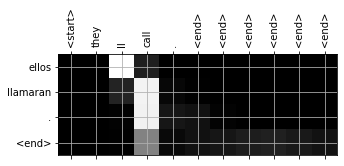

Expected: esta muy enfermo .
Translation: el esta muy enfermo .


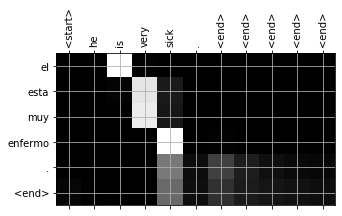

Expected: tom ayudara .
Translation: tom ayudara .


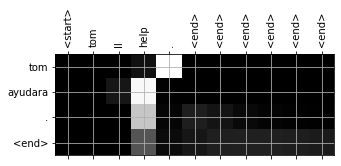

Expected: tom esta bien .
Translation: tom esta bien .


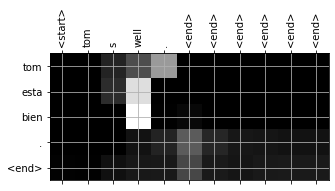

Expected: contemplalo .
Translation: miralo .


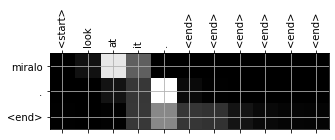

Expected: se desmayaron .
Translation: se desmayaron .


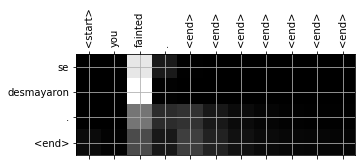

Expected: ¿ quien da la vez ?
Translation: ¿ quien esta ganando ?


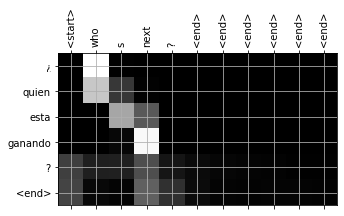

Expected: sujetalo fuerte .
Translation: agarrate fuerte .


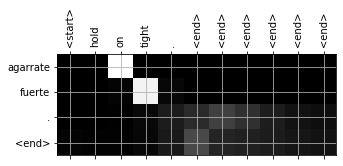

Expected: ella le beso .
Translation: ella lo beso .


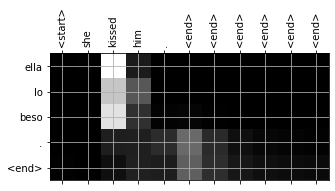

Expected: estoy muerto de hambre .
Translation: me muero de hambre .


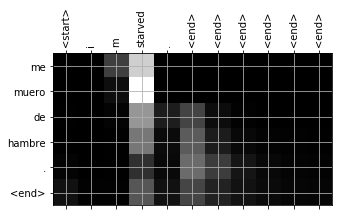

Expected: tom quiere a mary .
Translation: tom quiere a mary .


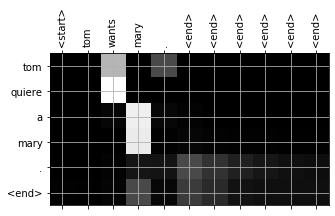

Expected: pruebe un poco .
Translation: prueben un poco .


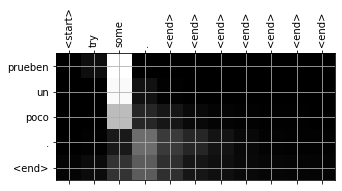

Expected: soy una persona .
Translation: soy un hombre .


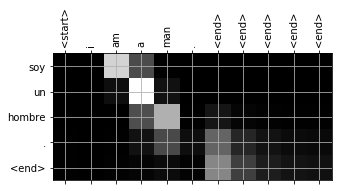

Expected: conduzca con cuidado .
Translation: conduzca con cuidado .


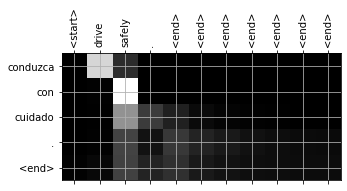

Expected: tiene un libro .
Translation: ella tiene un libro .


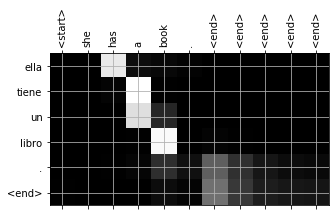

Expected: es brasilena .
Translation: es brasilena .


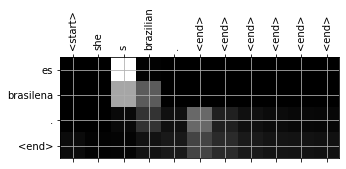

Expected: mirame .
Translation: limitate a mirarme .


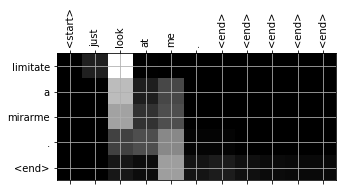

Expected: no llore .
Translation: no llores .


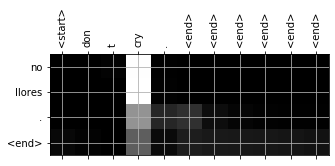

Expected: nos vimos hoy .
Translation: nos encontramos hoy .


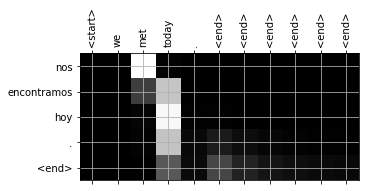

Expected: tenia hambre .
Translation: me senti hambre .


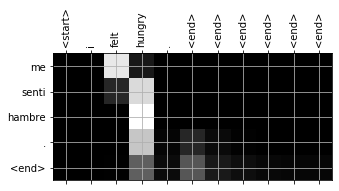

Expected: ¿ que hay ?
Translation: ¿ que hay ?


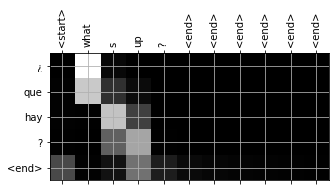

Expected: tom miro .
Translation: tom miro .


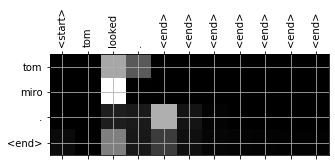

Expected: nos quedamos .
Translation: nos estamos mudando .


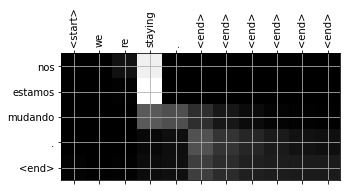

Expected: este es el fin .
Translation: esto es el final .


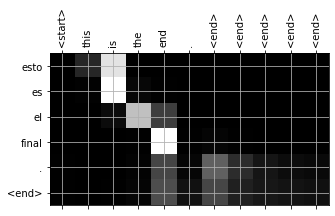

Expected: solamente quedate cerca .
Translation: solamente quedate cerca .


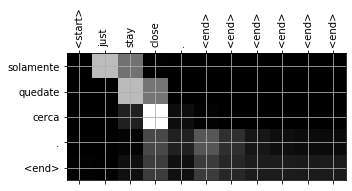

Expected: el se levanto .
Translation: el se levanto .


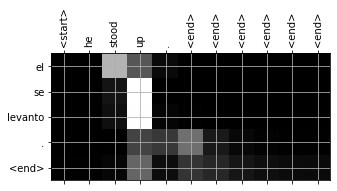

In [15]:
# Check translation for elements in test set
for batch in test_dataset:
    for source, target in zip(batch[0], batch[1]):
        # Prepares input
        source = tf.expand_dims(source,0)
        # Prints expected translation
        words = []
        for word in target.numpy():
            decoded = builder.target_tokenizer.index_to_word[word].decode()
            words.append(decoded)
            if decoded == '<end>':
                break
        print('Expected:', ' '.join(words[1:-1]))
        # Prints actual translation
        words = []
        prediction, attention = translator.translate(source, return_attention=True)
        for word in prediction:
            decoded = builder.target_tokenizer.index_to_word[word].decode()
            words.append(decoded)
        print('Translation:', ' '.join(words[:-1]))
        # Plots attention
        plot_attention(attention, tf.squeeze(source).numpy(), prediction,
                       builder.source_tokenizer.index_to_word,
                       builder.target_tokenizer.index_to_word)